In [ ]:
# I created this notebook to experiment around with the bias variance tradeoff
# and get some interest graphs as well.

import numpy as np
import matplotlib.pyplot as plt

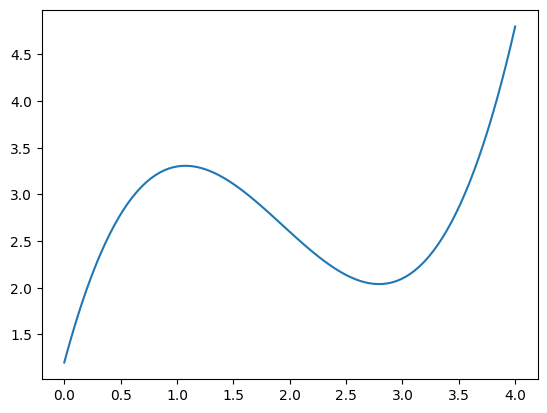

In [ ]:
# We'll try to predict a random polynomial function which has some noise in the data
# x from 0 to 4

# Why this particular function? I plotted something random in Desmos and it looks good
# Data generation:
def f1(x):
  return 0.5*x**3 - 2.9*x**2 + 4.5*x + 1.2

# plotting the function
x_vals = np.linspace(0, 4, 100)
y_vals = f1(x_vals)
plt.plot(x_vals, y_vals)
plt.show()

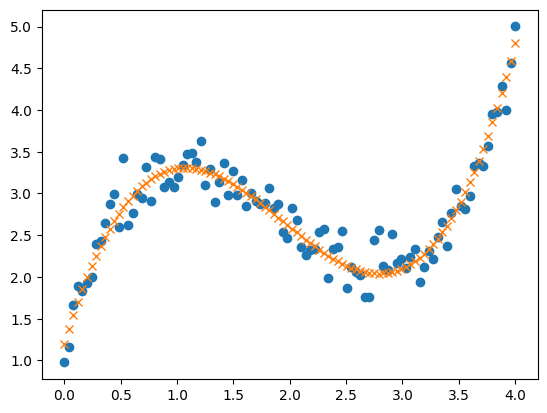

In [ ]:
# Now to prepare our data with noise
np.random.seed(42)
x_rand = np.random.choice(x_vals, 100, replace=False)

max_noise = 0.2
noise = np.random.randn(len(x_rand)) * max_noise
y_rand = f1(x_rand) + noise
plt.plot(x_rand, y_rand, 'o')
plt.plot(x_rand, f1(x_rand), 'x')
plt.show()

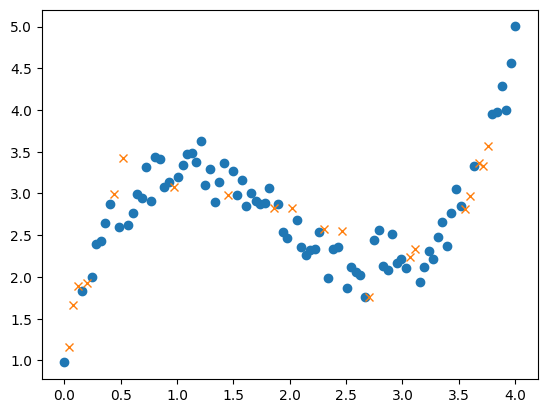

In [ ]:
np.random.seed(43)
train_indices = np.random.choice(np.arange(100), 80, replace=False)

x_train = x_rand[train_indices]
y_train = y_rand[train_indices]

test_indices = np.array([i for i in range(100) if i not in train_indices])
x_test = x_rand[test_indices]
y_test = y_rand[test_indices]
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.show()

In [ ]:
# Now we'll try to fit multiple polynomials to this data. Higher degree = more flexible!
class PolyRegressor:
  def __init__(self, degree: int, learning_rate: float, batch_size: int):
    self.degree = degree
    self.n = self.degree + 1
    self.learning_rate = learning_rate
    self.coefs = np.random.randn(self.n, 1) # +1 for constant
    self.batch_size = batch_size

  def P(self, x):
    X = np.array([x ** i for i in range(self.n)])
    return self.coefs.T @ X

  def cost(self, x, y):
    # x_vals, y_vals are simple np arrays
    costs = (self.P(x) - y) ** 2
    return costs.mean()

  def cost_gradient(self, x, y):
    # del C/del c_k = 2 sum(P(x_i) - y_i) * x^k
    derivs = [(2 * (self.P(x) - y) * x**(k)).mean() for k in range(self.n)]
    return np.array(derivs).reshape(-1, 1)

  def update_coefs(self, x, y):
    for k in range(self.n):
      grad = self.cost_gradient(x, y)
      self.coefs -= self.learning_rate * grad

  def train(self, x_train, y_train, n_epochs):
    # batch gradient descent
    x = np.array(x_train)
    y = np.array(y_train)
    print(f'Initial cost: {self.cost(x, y)}')

    costs = [self.cost(x, y)]
    for ep in range(n_epochs):
      shuffled_i = np.random.permutation(len(x))
      for i in range(0, len(x), self.batch_size):
        x_t = x[shuffled_i[i: i + self.batch_size]]
        y_t = y[shuffled_i[i: i + self.batch_size]]
        self.update_coefs(x_t, y_t)
      if ep % 10000 == 0:
        cost = self.cost(x, y)
        if np.isnan(cost):
          break
        if abs(cost - costs[-1]) < 0.00001:
          break
        costs.append(cost)
        print(f"Epoch {ep}: {cost}")


polys = []
for k in range(1, 4):
  # this only works up to degree 3 :(
  poly = PolyRegressor(k, 0.001, 10)
  print(f'Training polynomial of degree {k}')
  poly.train(x_train, y_train, 100000)
  polys.append(poly)

Training polynomial of degree 1
Initial cost: 28.304065753197598
Epoch 0: 19.870079053181136
Epoch 10000: 0.4345535579162635
Training polynomial of degree 2
Initial cost: 44.39956926417507
Epoch 0: 1.205418814242926
Epoch 10000: 0.4066641580876846
Epoch 20000: 0.40907970881695455
Epoch 30000: 0.40086029260368916
Epoch 40000: 0.41514694006153496
Epoch 50000: 0.40094221354897586
Epoch 60000: 0.42478169956323414
Epoch 70000: 0.4020753502268434
Epoch 80000: 0.4055447887803794
Epoch 90000: 0.4033035497482735
Training polynomial of degree 3
Initial cost: 1752.2511115265056
Epoch 0: 3.7308724051896376
Epoch 10000: 0.038976731035752166
Epoch 20000: 1.5540083702012848
Epoch 30000: 0.03802855965867524
Epoch 40000: 0.03475234246846165
Epoch 50000: 0.04029979506453098
Epoch 60000: 0.04151090682515496
Epoch 70000: 0.03726616647084606
Epoch 80000: 0.03486909447570933
Epoch 90000: 0.04173751544034608
Training polynomial of degree 4
Initial cost: 11897.592683531151
Epoch 0: 4.5588474792399036e+81


<ipython-input-71-4686a3235263>:21: RuntimeWarning: overflow encountered in multiply
  derivs = [(2 * (self.P(x) - y) * x**(k)).mean() for k in range(self.n)]
<ipython-input-71-4686a3235263>:27: RuntimeWarning: invalid value encountered in subtract
  self.coefs -= self.learning_rate * grad


Training polynomial of degree 5
Initial cost: 434.3018728640185
Epoch 0: 2.574309634647345e+204


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Training polynomial of degree 6
Initial cost: 3527022.5943073975
Epoch 0: inf


<ipython-input-71-4686a3235263>:16: RuntimeWarning: overflow encountered in square
  costs = (self.P(x) - y) ** 2


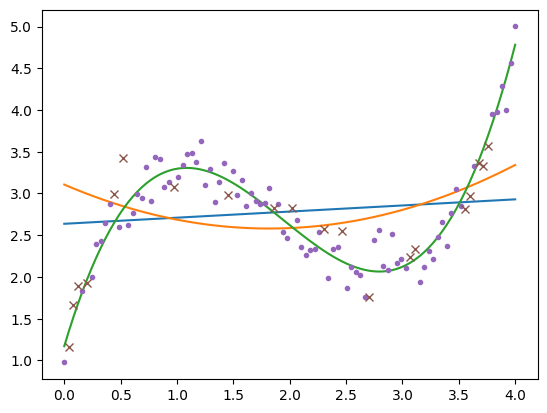

In [ ]:
# now let's visualise
x_vals = np.linspace(0, 4, 100)
for i in range(4):
  plt.plot(x_vals, polys[i].P(x_vals).flatten())
plt.plot(x_train, y_train, '.')
plt.plot(x_test, y_test, 'x')
plt.show()

# Need to tackle the NaN issue to get more polymonials!